# Background

- Iris dataset is a popular dataset for classification and clustering problems in machine learning. 
- The dataset contains 150 observations of iris flowers, with four features for each flower: sepal length, sepal width, petal length, and petal width. 
- The dataset includes three different species of iris flowers: **Iris Setosa**, **Iris Versicolor**, and **Iris Virginica**. 
- The species of each flower is also included in the dataset as the target variable. 
- This dataset is widely used as a benchmark problem in machine learning and is considered a good starting point for learning about classification algorithms.

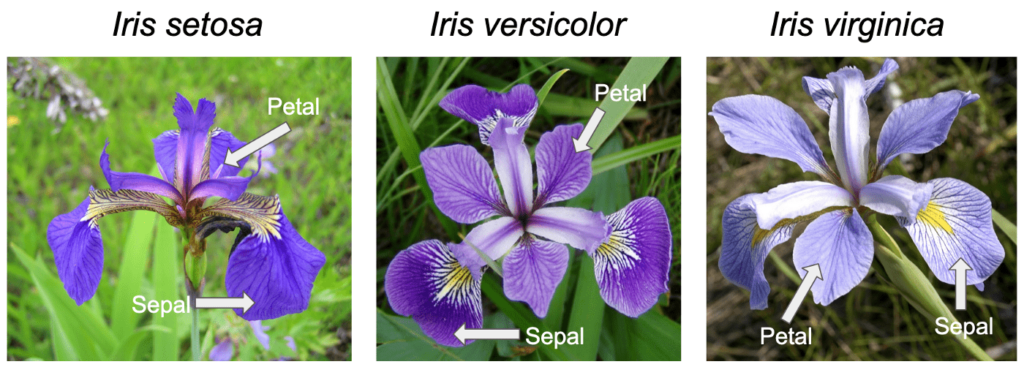

- Sepal : 꽃받침
- Petal : 꽃잎

# Import libraries & Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Get the features and target variables
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target # target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Validation

In [3]:
# target 제외 소숫점 데이터
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
# 결측치 없음
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# EDA

**target**
- 0 : Iris Setosa
- 1 : Iris Versicolor
- 2 : Iris Virginica

In [5]:
# 클래스 종류 3가지
df.target.unique()

array([0, 1, 2])

In [6]:
# 클래스 비율 1:1:1
df.value_counts('target')

target
0    50
1    50
2    50
dtype: int64

**나머지 컬럼**

In [7]:
# 수치만 봐선 이해 어렵다 
df.iloc[:,:-1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- 히스토그램 : type이 float라서 분포부터 확인
    - petal(꽃잎)의 mode가 2개(길이,폭 모두)
        - 그림으로 보면 setosa(길쭉함) vs 나머지
        
    - speal(꽃받침)의 경우 정규분포에 가까워 보인다. 
        - 길이부분의 분포가 조금 더 넓어 보인다.

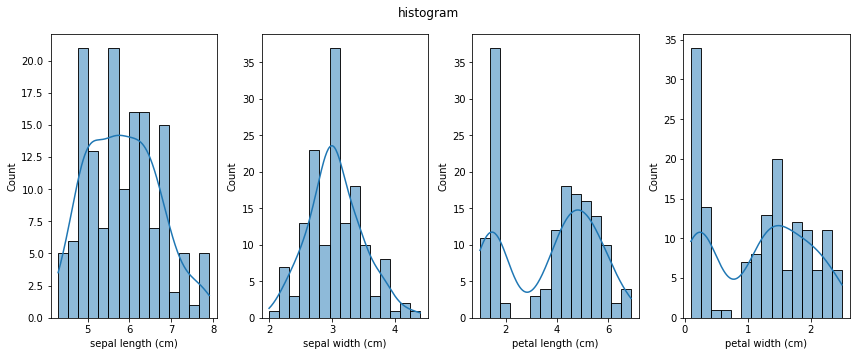

In [8]:
cols = df.columns[:-1]

fig, ax = plt.subplots(1,4, figsize=(12,5))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], ax=ax[i], bins=15, kde=True)

plt.suptitle('histogram')
plt.tight_layout()
plt.show()

- violin plot vs box plot
    - boxplot으로 보니까 조금더 target 클래스별로 구분이 잘 되는 것 같다.
    - 컬럼별로 특성 구분이 잘 되는것 같아 보인다.
    - 클래스가 3개고 기준치만 잘 설정해주면 충분히 구분이 가능해 보여서, 랜덤포레스트 모델을 쓰면 되겠다고 생각했음

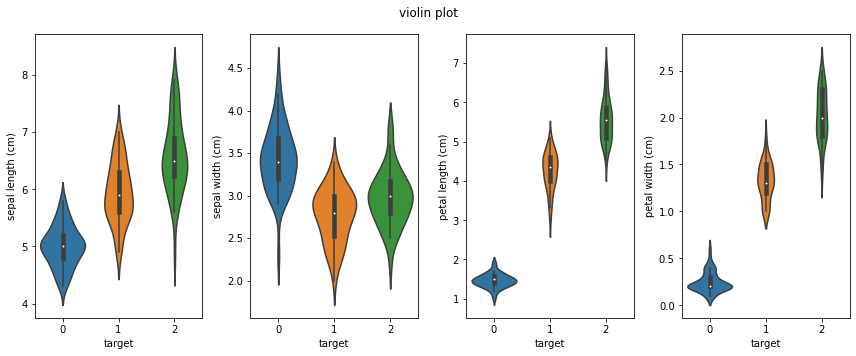

In [9]:
cols = df.columns[:-1]

fig, ax = plt.subplots(1,4, figsize=(12,5))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.violinplot(data=df, x='target', y=col, ax=ax[i])

plt.suptitle('violin plot')

plt.tight_layout()
plt.show()

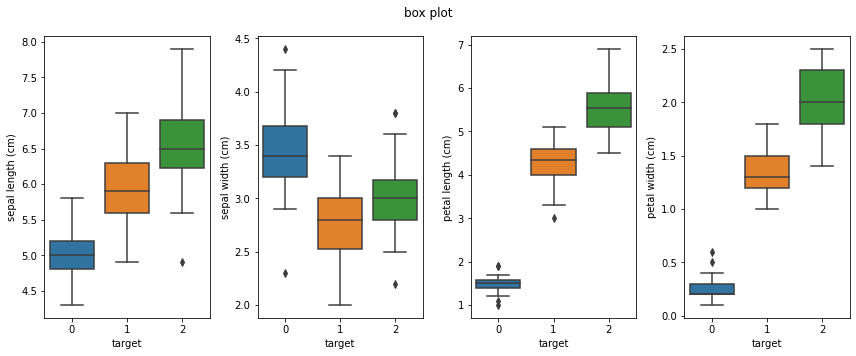

In [10]:
cols = df.columns[:-1]

fig, ax = plt.subplots(1,4, figsize=(12,5))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df, x='target', y=col, ax=ax[i])

plt.suptitle('box plot')

plt.tight_layout()
plt.show()

- pair plot - 전체 컬럼간 확인
    - petal에서 setosa는 나머지와 구분 잘되는데, 1과 2번은 비슷 함
    - 2번의 꽃잎이 1번의 꽃잎보다 커보인다

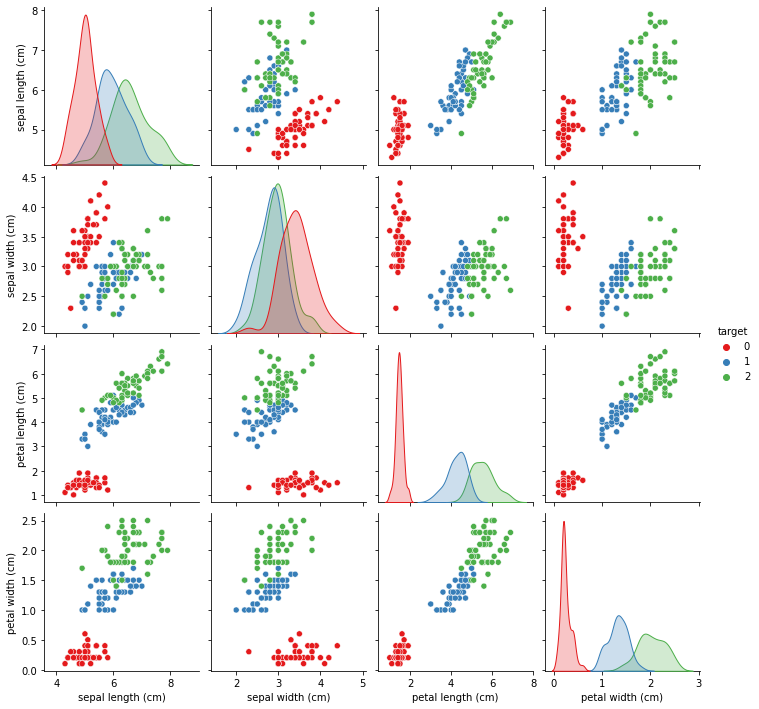

In [11]:
sns.pairplot(df, hue='target', palette="Set1")
plt.show()

# Modeling

## train/test split

In [12]:
# train test 분리
y = df['target']
X = df.drop('target',axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

정확도 : 100점 ??, 과적합?

In [14]:
# 점수 확인
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



feature importance, 특성 중요도
- petal의 특성 중요도가 높다. 꽃받침보다는 꽃잎으로 0번과 나머지 클래스를 구분하기 쉽기 때문에 높게 나왔지 않을까?

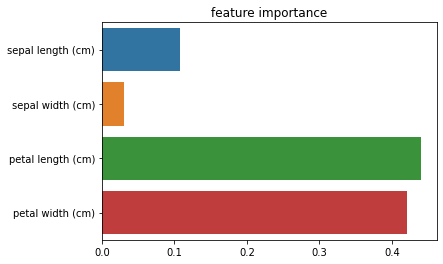

In [16]:
# feature importance 시각화
sns.barplot(x=rf.feature_importances_, y=iris.feature_names)
plt.title('feature importance')
plt.show()

## k-fold

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Score: ", round(scores.mean(),4))

Cross-Validation Scores:  [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Score:  0.9667
